# Métodos iterativos

In [1]:
!pip install numpy
!pip install matplotlib

import time
import numpy as np
import matplotlib.pyplot as plt

## Programando

![](../resources/images/lab5/programming-section.png)

**Punto 1.1:** Calculamos el gradiente.

$$
\begin{gather}
\nabla f = 
\begin{bmatrix}
200(x_2 - x_1^2)(-2 x_1) + 2(1 - x_1) \\
200(x_2 - x_1^2)
\end{bmatrix} \\
\nabla f = 2
\begin{bmatrix}
-200(x_1 x_2 - x_1^3) + 1 - x_1 \\
100(x_2 - x_1^2)
\end{bmatrix} \\
\boxed{
\nabla f = 2
\begin{bmatrix}
200 x_1^3 - 200 x_1 x_2 - x_1 + 1 \\
100(x_2 - x_1^2)
\end{bmatrix}}
\end{gather}
$$

**Punto 1.2:** Implementamos el método de gradiente descendiente para la función $f(x)$.

In [2]:
def gradient(point):
    df_x1 = 200.0 * np.power(point[0], 3) - 200.0 * np.multiply(point[0], point[1]) - point[0] + 1.0
    df_x2 = 100.0 * (point[1] - point[0]**2)
    return np.multiply(2.0, np.array([df_x1, df_x2]))

def steepest_descent(iterations, step_size, initial_point):
    min_diff = 0.00001
    max_diff = 1 * 10 ** 80
    values = []
    gradients = []
    times = []
    
    xk = initial_point
    for i in range(iterations):
        grad_xk = gradient(xk)
        t_start = time.time()
        values.append(xk - step_size * gradient(xk))
        times.append(time.time() - t_start)
        gradients.append(grad_xk)
        xk = values[i]
        
        if i > 0:
            diff = np.linalg.norm(values[i] - values[i - 1])
            if diff < min_diff or diff > max_diff:
                break
    
    return [np.array(gradients), np.array(times), np.array(values)]

Utilizamos dos puntos para los métodos. En primera instancia, usamos un **paso arbitrario**.

In [3]:
p_a = np.array([1.2, 1.2])
p_b = np.array([-1.2, 1])
p_manual = 0.001

Utilizamos los parámetros para el método de **Gradiente descendiente**.

In [4]:
results_step_des = {
    'manual_pa': steepest_descent(20, p_manual, p_a), 
    'manual_pb': steepest_descent(20, p_manual, p_b),
}

**Punto 1.3:** Implementamos el método de Newton. Empezamos calculando la *Hessiana*.

$$
\begin{gather}
\nabla f^2 = 2
\begin{bmatrix}
600 x_1^2 - 200 x_2 - 1 & -200 x_1 \\
100(-2 x_1) & 100
\end{bmatrix} \\
\boxed{
\nabla f^2 = 200
\begin{bmatrix}
6 x_1^2 - 2 x_2 - \frac{1}{100} & -2 x_1 \\
-2 x_1 & 1
\end{bmatrix}}
\end{gather}
$$

In [5]:
def hessian(point):
    h_11 = 6 * point[0] ** 2 - 2 * point[1] - 1.0/100.0
    h_12 = -2 * point[0]
    h_21 = h_12
    h_22 = 1

    return 200 * np.array([[h_11, h_12], [h_21, h_22]])

def newton(iterations, step_size, initial_point):
    min_diff = 0.00001
    max_diff = 1 * 10 ** 80
    values = []
    gradients = []
    times = []
    
    
    xk = initial_point
    for i in range(iterations):
        grad_xk = gradient(xk)
        t_start = time.time()
        values.append(xk - np.matmul(np.linalg.inv(hessian(xk)), grad_xk))
        times.append(time.time() - t_start)
        gradients.append(grad_xk)
        xk = values[i]
        
        if i > 0:
            diff = np.linalg.norm(values[i] - values[i - 1])
            if diff < min_diff or diff > max_diff:
                break

    return [np.array(gradients), np.array(times), np.array(values)]

Utilizamos los mismos puntos para el método:

In [6]:
results_newton = {
    'manual_pa': newton(20, p_manual, p_a), 
    'manual_pb': newton(20, p_manual, p_b),
}

**Punto 1.4:** Calcular los pasos fijos.

In [7]:
def step_descent(point):
    return -1 * np.divide(gradient(point), np.linalg.norm(gradient(point)))

def step_newton(point):
    return -1 * np.matmul(np.linalg.inv(hessian(point)), gradient(point))

Usamos los puntos para calcular el paso óptimo:

In [8]:
p_descent_pa = step_descent(p_a)
p_descent_pb = step_descent(p_b)
p_newton_pa = step_newton(p_a)
p_newton_pb = step_newton(p_b)

results_step_des['opt_pa'] = steepest_descent(20, p_descent_pa, p_a)
results_step_des['opt_pb'] = steepest_descent(20, p_descent_pb, p_b)
results_newton['opt_pa'] = newton(20, p_newton_pa, p_a)
results_newton['opt_pb'] = newton(20, p_newton_pb, p_b)

Finalmente, visualizamos los resultados obtenidos.

In [9]:
def point_marker(data):
    displacement = 0.0001
    for i in range(data.shape[0]):
        plt.text(data[i, 0] + displacement, data[i, 1] + displacement, f'{i + 1}', fontsize = 8, ha = 'right', color='black')

Para el método de **Gradiente descendiente** tenemos los siguientes resultados en cada unos de los puntos:

TypeError: list indices must be integers or slices, not tuple

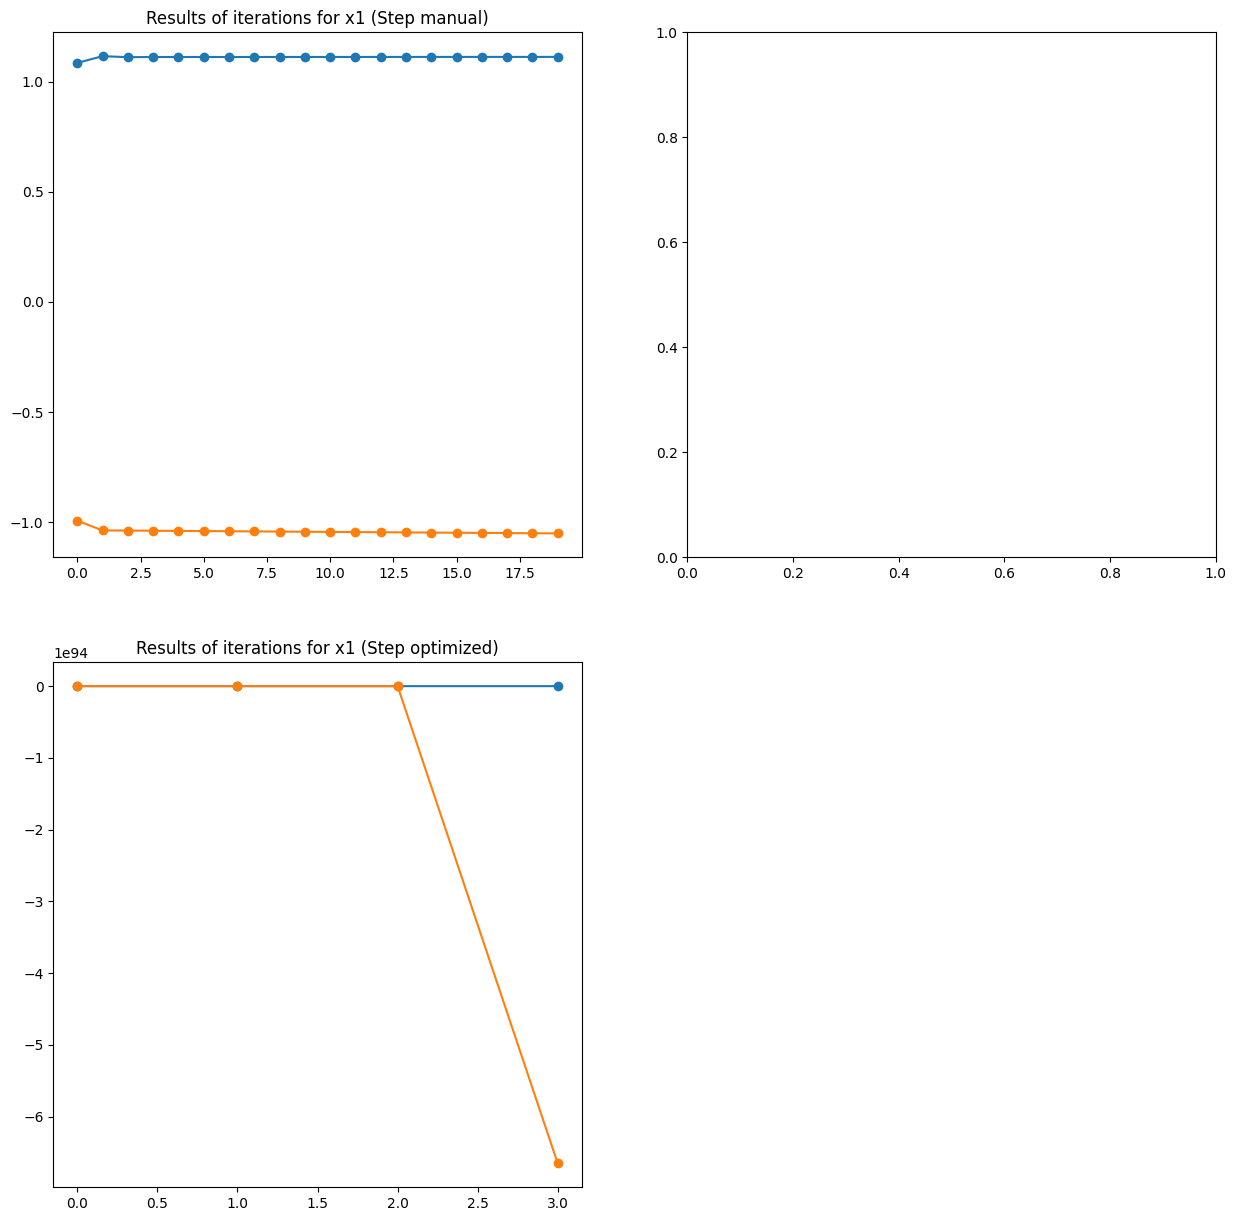

In [10]:
plt.figure(figsize = (15, 15))
plt.subplot(2, 2, 1)
plt.plot(results_step_des['manual_pa'][2][:, 0], marker = 'o')
plt.plot(results_step_des['manual_pb'][2][:, 0], marker = 'o')
plt.title('Results of iterations for x1 (Step manual)')
plt.subplot(2, 2, 3)
plt.plot(results_step_des['opt_pa'][2][:, 0], marker = 'o')
plt.plot(results_step_des['opt_pb'][2][:, 0], marker = 'o')
plt.title('Results of iterations for x1 (Step optimized)')

plt.subplot(2, 2, 2)
plt.plot(results_step_des['opt_pa'][:, 0], results_step_des['opt_pa'][:, 1], marker = 'o')
point_marker(results_step_des['opt_pa'])
plt.subplot(2, 2, 4)
plt.plot(results_step_des['opt_pb'][:, 0], results_step_des['opt_pb'][:, 1], marker = 'o')
point_marker(results_step_des['opt_pb'])

## Análisis de convergencia y comparación de rendimiento

### A: Gráfico de convergencia

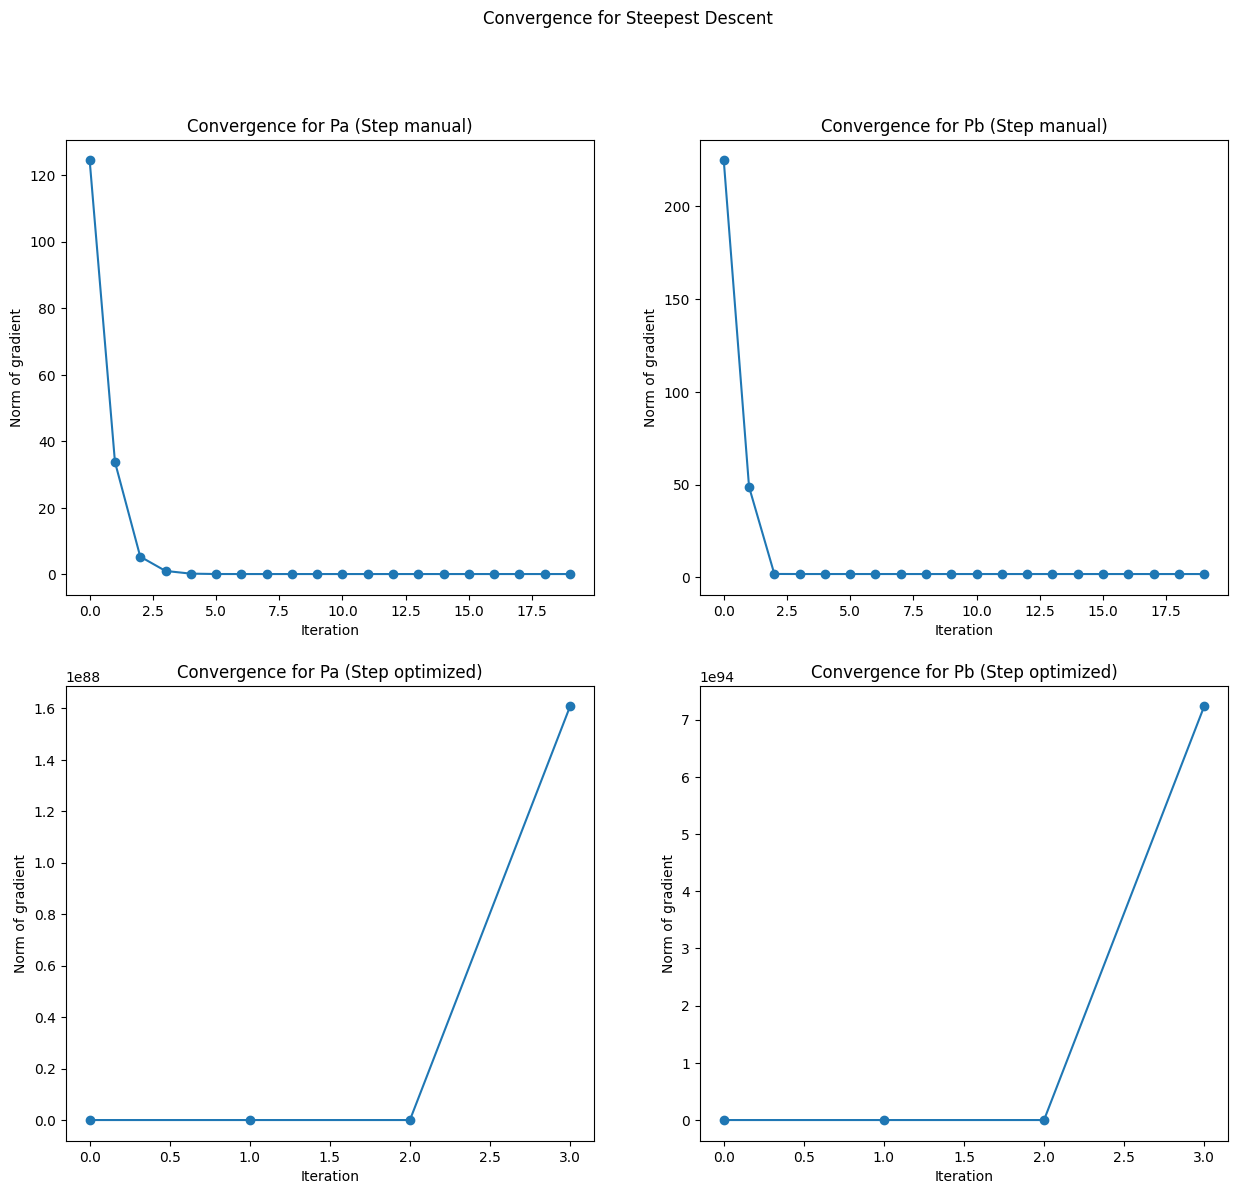

In [11]:
plt.figure(figsize = (15, 13))

plt.subplot(2, 2, 1)
plt.plot(np.linalg.norm(results_step_des['manual_pa'][0], axis = 1), marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('Norm of gradient')
plt.title('Convergence for Pa (Step manual)')
plt.subplot(2, 2, 2)
plt.plot(np.linalg.norm(results_step_des['manual_pb'][0], axis = 1), marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('Norm of gradient')
plt.title('Convergence for Pb (Step manual)')

plt.subplot(2, 2, 3)
plt.plot(np.linalg.norm(results_step_des['opt_pa'][0], axis = 1), marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('Norm of gradient')
plt.title('Convergence for Pa (Step optimized)')
plt.subplot(2, 2, 4)
plt.plot(np.linalg.norm(results_step_des['opt_pb'][0], axis = 1), marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('Norm of gradient')
plt.title('Convergence for Pb (Step optimized)')

plt.suptitle('Convergence for Steepest Descent')
plt.show()

In [14]:
p_newton_pb

array([-0.02528736,  0.50068966])

In [15]:
p_manual

0.001

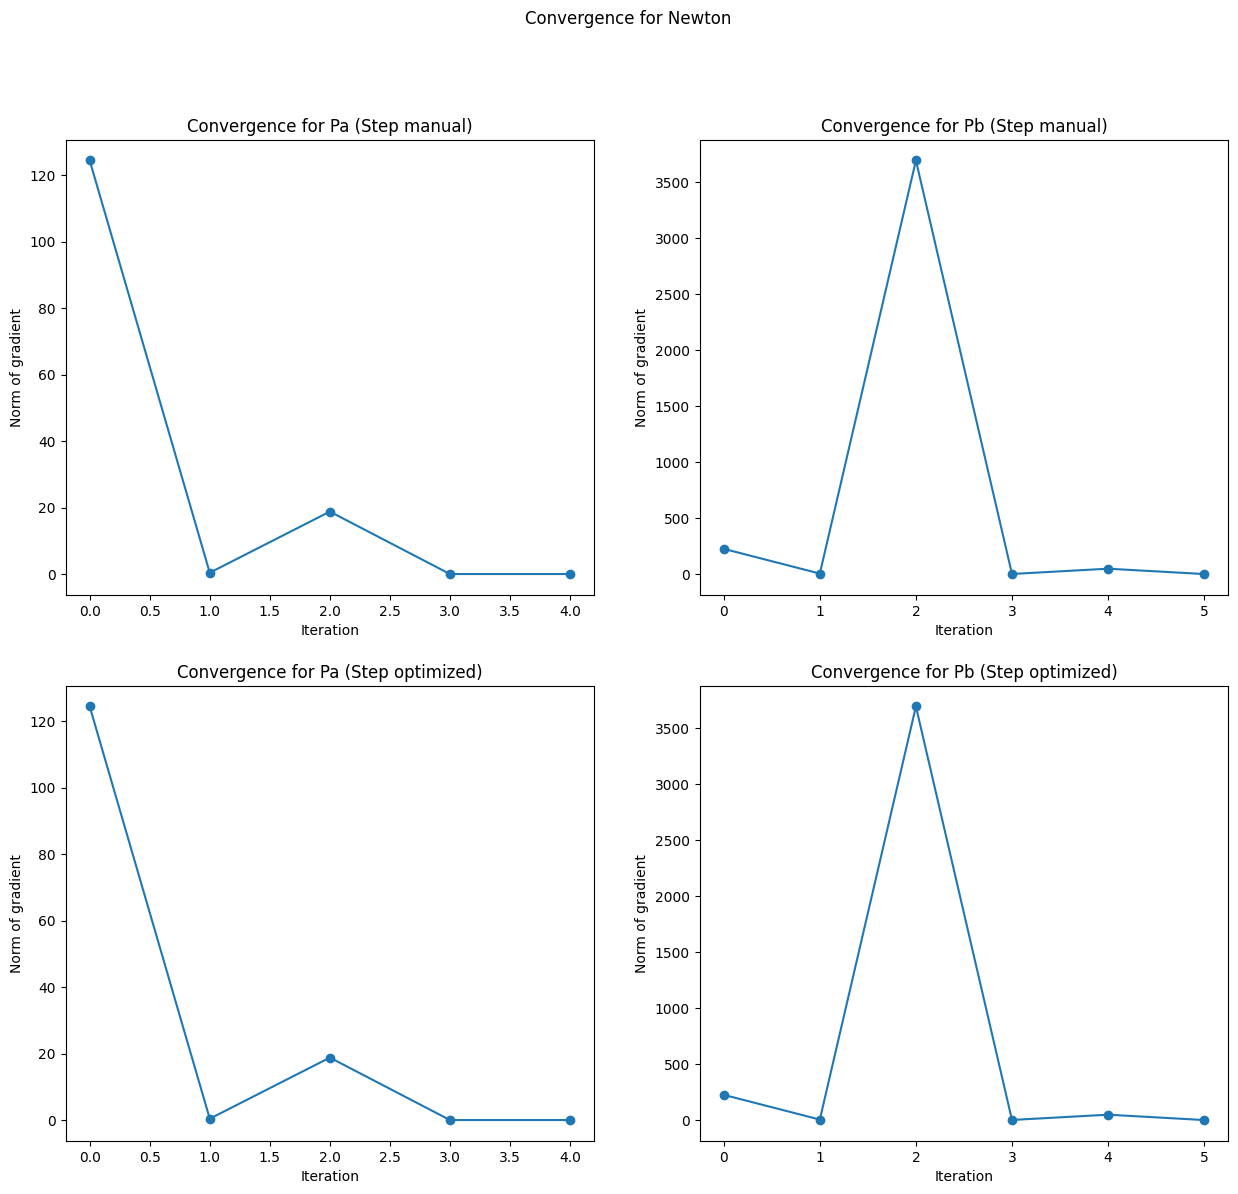

In [16]:
plt.figure(figsize = (15, 13))

plt.subplot(2, 2, 1)
plt.plot(np.linalg.norm(results_newton['manual_pa'][0], axis = 1), marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('Norm of gradient')
plt.title('Convergence for Pa (Step manual)')
plt.subplot(2, 2, 2)
plt.plot(np.linalg.norm(results_newton['manual_pb'][0], axis = 1), marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('Norm of gradient')
plt.title('Convergence for Pb (Step manual)')

plt.subplot(2, 2, 3)
plt.plot(np.linalg.norm(results_newton['opt_pa'][0], axis = 1), marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('Norm of gradient')
plt.title('Convergence for Pa (Step optimized)')
plt.subplot(2, 2, 4)
plt.plot(np.linalg.norm(results_newton['opt_pb'][0], axis = 1), marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('Norm of gradient')
plt.title('Convergence for Pb (Step optimized)')

plt.suptitle('Convergence for Newton')
plt.show()

### Comparación de rendimiento

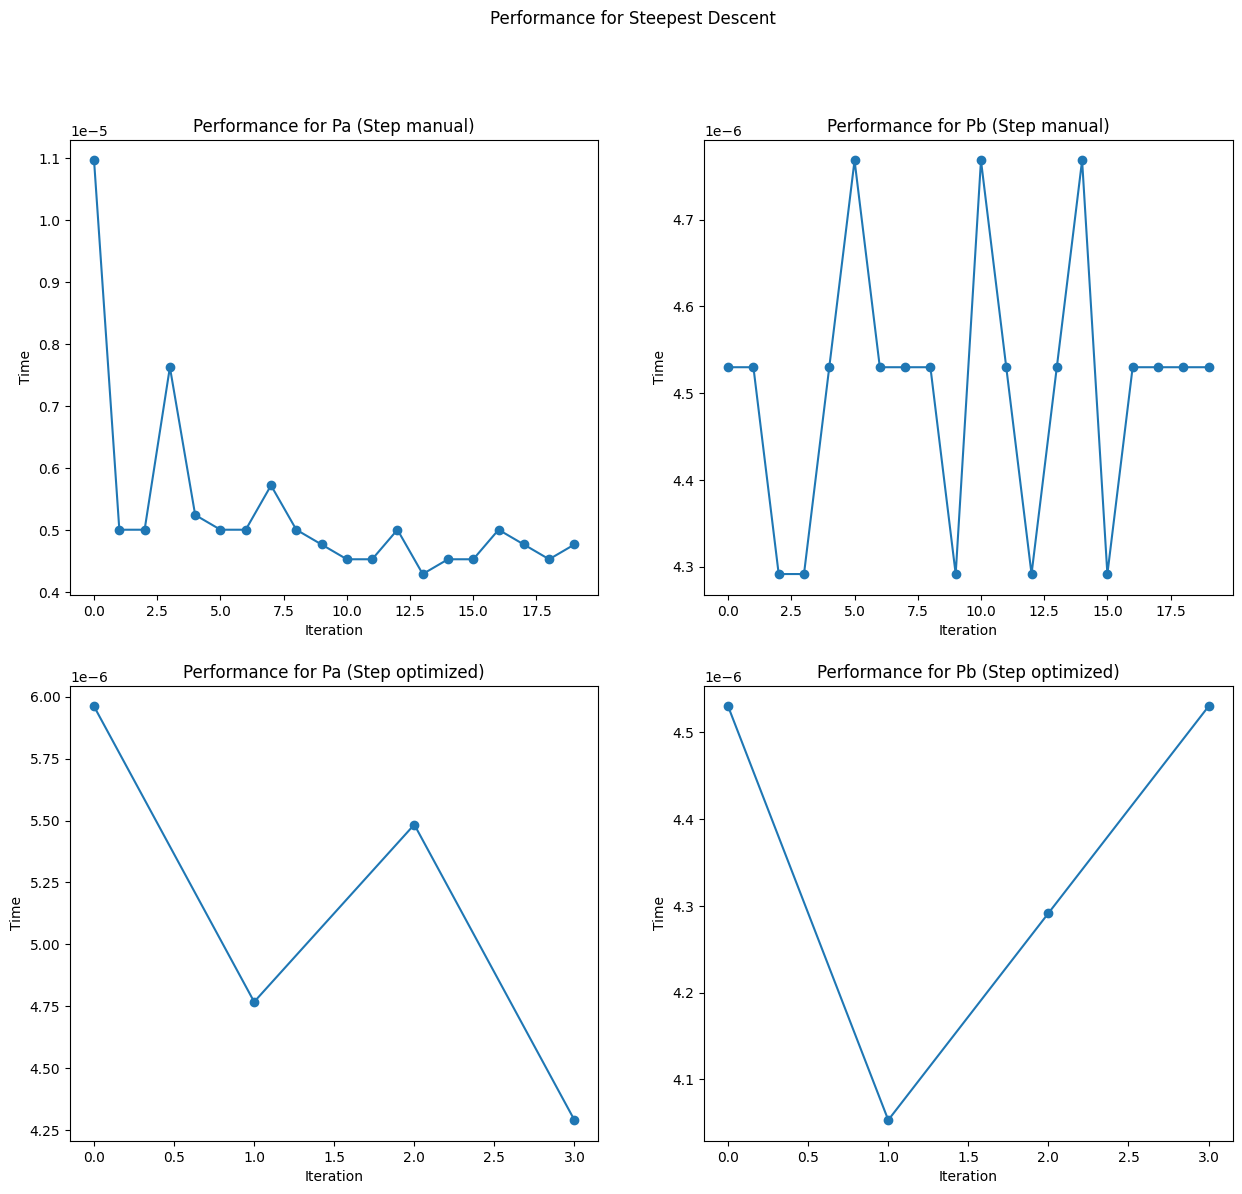

In [18]:
plt.figure(figsize = (15, 13))

plt.subplot(2, 2, 1)
plt.plot(results_step_des['manual_pa'][1], marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('Time')
plt.title('Performance for Pa (Step manual)')
plt.subplot(2, 2, 2)
plt.plot(results_step_des['manual_pb'][1], marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('Time')
plt.title('Performance for Pb (Step manual)')

plt.subplot(2, 2, 3)
plt.plot(results_step_des['opt_pa'][1], marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('Time')
plt.title('Performance for Pa (Step optimized)')
plt.subplot(2, 2, 4)
plt.plot(results_step_des['opt_pb'][1], marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('Time')
plt.title('Performance for Pb (Step optimized)')

plt.suptitle('Performance for Steepest Descent')
plt.show()